### Loading CARS93 and HR Datasets into pandas Dataframe:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np


# reading data into dataframe
cars_df = pd.read_csv('/content/drive/MyDrive/DataScience/cars93.csv')

# printing top 5 rows
cars_df.head()

,Manufacturer,Model,Type,Price,MPG.city,AirBags,Horsepower,Passengers,Rear.seat.room,Luggage.room
0,Acura,Integra,Small,3259500,25,Driver only,140,5,26.5,11.0
1,Acura,Legend,Midsize,6949500,18,Driver & Passenger,200,5,30.0,15.0
2,Audi,90,Compact,5965500,20,Driver only,172,5,28.0,14.0
3,Audi,100,Midsize,7728500,19,Driver & Passenger,172,6,31.0,17.0
4,BMW,535i,Midsize,6150000,22,Driver only,208,4,27.0,13.0


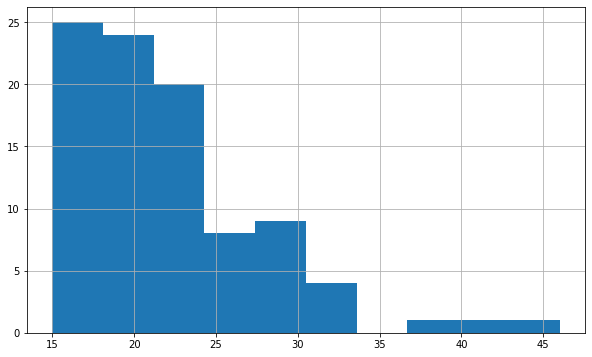

In [ ]:
cars_df['MPG.city'].hist(figsize = (10,6), bins = 10)	

## Central Limit Theorem

In [ ]:
sampling_distribution = []
for i in range(500):
  # generate 50 integers indexes between 0:len(series)
  sample_ind = np.random.randint(0,len(cars_df['MPG.city']), 50)

  # extract sample of size 50 using indexes generated in prev step
  sample = cars_df['MPG.city'][sample_ind]
  
  # calculate sample mean
  sample_mean = sample.mean()

  #add sample mean to sampling distribution 
  sampling_distribution.append(sample_mean)

print(sampling_distribution)

[21.72, 21.16, 22.68, 23.14, 21.52, 22.0, 22.2, 21.74, 22.7, 22.86, 23.1, 21.48, 21.42, 21.98, 21.7, 21.2, 23.24, 22.3, 22.24, 21.3, 22.66, 22.44, 22.84, 22.16, 23.06, 21.36, 20.72, 23.12, 22.44, 24.02, 21.78, 23.56, 22.88, 22.18, 21.9, 21.9, 23.18, 20.8, 24.08, 22.44, 23.1, 21.24, 21.58, 23.48, 21.0, 21.68, 21.84, 22.14, 22.7, 22.28, 21.44, 22.56, 24.04, 23.56, 21.58, 21.5, 23.26, 23.02, 20.86, 21.72, 21.42, 22.02, 24.38, 22.12, 23.42, 22.14, 23.18, 23.76, 22.94, 22.32, 22.76, 22.98, 22.42, 23.3, 21.58, 21.92, 22.16, 22.52, 23.78, 21.98, 22.92, 23.9, 22.08, 22.18, 22.42, 21.86, 23.9, 21.84, 22.62, 21.08, 22.42, 21.18, 23.22, 23.92, 22.08, 21.0, 21.76, 22.24, 21.88, 21.92, 22.54, 21.4, 22.22, 23.1, 21.74, 22.72, 23.2, 22.62, 22.48, 22.06, 22.22, 22.18, 21.54, 22.46, 21.48, 22.04, 21.24, 21.6, 23.04, 22.7, 22.16, 22.18, 22.18, 21.9, 23.26, 22.46, 21.32, 21.5, 22.98, 22.68, 21.88, 21.18, 20.94, 23.36, 22.38, 21.1, 22.7, 21.88, 22.32, 22.78, 23.32, 21.58, 23.16, 22.14, 22.06, 22.72, 21.88

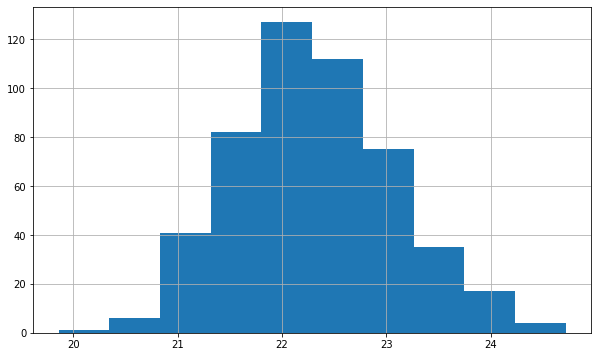

In [ ]:
pd.Series(sampling_distribution).hist(figsize = (10,6), bins = 10)

We can observe thst sampling distribution is following Bell Curve

**The Central Limit Theorem** states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger - no matter what the shape of the population distribution. ​

## Section 2 Hypothesis Testing


Step 0: Define problem Objective

Step 1: Specify the Null Hypothesis.​

Step 2: Specify the Alternative Hypothesis.​

Step 3: Set the Significance Level ​

Step 4: Calculate the Test Statistic and Corresponding P-Value.​

Step 5: Drawing a Conclusion.



### Step 0: Define problem Objective:

`Exercising does not affect weight`

This statement is my Hypothesis. Let’s call it Null hypothesisfor now. For now, it is the status quo as in we consider it to be true

### Step 1 and 2: Specify Null and Alternate Hypothesis:

Hº: Exercising does not affect weight. Or equivalently 𝜇 = 0

Hᴬ: Exercise does reduce weight. Or equivalently 𝜇>0

We collect weight loss data for a sample of 30 people who regularly exercise for over 3 months.

- WeightLoss Sample Mean = 2 kg
- Sample Standard Deviation = 1 kg

Does this prove that exercise does reduce weight? Infact, it sort of looks like that exercising does have its benefits as people who exercise have lost on an average 2 kgs.

### Step 3: Set the Significance Level ​

Assuming that the null hypothesis is true, what is the probability of observing a sample mean of 2 kg or more extreme than 2 kg?

 - Assuming we can calculate this — If this probability value is meagre (lesser than a threshold value), we reject our null hypothesis. And otherwise, we fail to reject our null hypothesis. Why fail to reject and not accept? I will answer this later.

- This probability value is actually the p-value. Simply, it is just the probability of observing what we observed or extreme results if we assume our null hypothesis to be true.

- The statisticians call the threshold as the significance level(𝜶), and in most of the cases, 𝜶 is taken to be 0.05.



*As we already know, the central limit theorem states that if you have a population with mean μ and standard deviation σ, and take random samples from the population, then the distribution of the sample means will be approximately normally distributed with mean as the population mean and standard deviation σ/√n (Where σ is the standard deviation of the sample and n is the number of observations in the sample)*

### Step 4: Calculate the Test Statistic and Corresponding P-Value.​

Now we can use any statistical software/library to find the area under the curve:



In [ ]:
from scipy.stats import norm
import numpy as np

p = 1-norm.cdf(x = 2, loc = 0, scale = 1/np.sqrt(30))
print(p)

0.0


### Step 5: Drawing the Conclusion
As such, this is a very small probability p-value ( less than the significance level of 0.05) for the mean of a sample to take a value of 2 or more.

And so we can reject our Null hypothesis. And we can call our results statistically significant as in they don’t just occur due to mere chance